# Project: Online Retail Exploratory Data Analysis with Python

## Load the Data

In [204]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import matplotlib.ticker as mticker

In [47]:
#load data
df = pd.read_excel('Online Retail.xlsx')

df.info()

#display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Considering the Data

After reviewing the overview, I've created a set of questions to reveal sales trends for logistics and marketing planning:

Overall sales distribution by country
- Which countries have the highest total sales quantities? Which have the highest total transactions?

Monthly sales trends
- How do total sales quantities vary by month, and which month has the highest sales?

Daily sales trends within the highest sales month
- In the month with the highest sales, how do sales quantities vary by day? How do transactions compare?

Sales patterns by day of the week
- Which days of the week see the highest number of sales quantities and transactions overall?

Average daily revenue per month
- What is the average daily revenue for each month?




Starting with cleaning and restructuring the data.

In [149]:
#filter quantity for negative values
negative_quantity = df[df['Quantity'] < 0]

#show minimum and maximum quantity and how many are negative
print(df['Quantity'].min())
print(df['Quantity'].max())
len(negative_quantity)


1
5568


0

In [150]:
# display rows with quantity greater than 10000
df[df['Quantity'] > 10000].head() 

,Quantity,InvoiceDate,UnitPrice,Country,DayOfWeek


In [151]:
# check for exact duplicated rows
df.duplicated().sum()

np.int64(233505)

In [ ]:
# filter out duplicated rows
df = df.drop_duplicates()

#filter out quantities over 10000 and less than 0
df = df[(0<= df['Quantity']) & (df['Quantity'] <= 10000)]

#filter out irrelevant columns
df = df[['Quantity', 'InvoiceDate', 'UnitPrice', 'Country']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292546 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     292546 non-null  int64         
 1   InvoiceDate  292546 non-null  datetime64[ns]
 2   UnitPrice    292546 non-null  float64       
 3   Country      292546 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.2+ MB


In [ ]:
#Inspect new relevant data
df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 292546 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     292546 non-null  int64         
 1   InvoiceDate  292546 non-null  datetime64[ns]
 2   UnitPrice    292546 non-null  float64       
 3   Country      292546 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.2+ MB


,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
5,2,2010-12-01 08:26:00,7.65,United Kingdom
6,6,2010-12-01 08:26:00,4.25,United Kingdom
7,6,2010-12-01 08:28:00,1.85,United Kingdom
9,32,2010-12-01 08:34:00,1.69,United Kingdom
10,6,2010-12-01 08:34:00,2.10,United Kingdom
12,8,2010-12-01 08:34:00,3.75,United Kingdom
13,6,2010-12-01 08:34:00,1.65,United Kingdom


## Top Performing Countries 
Which countries have the highest total sales quantities?  Which have the highest total transactions?

In [57]:
#sort by country and sum quantity
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
top_countries.head(10)

Country
United Kingdom    4550579
Netherlands        200937
EIRE               147281
Germany            119156
France             112061
Australia           84199
Sweden              36078
Switzerland         30618
Spain               27944
Japan               26016
Name: Quantity, dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\401428926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


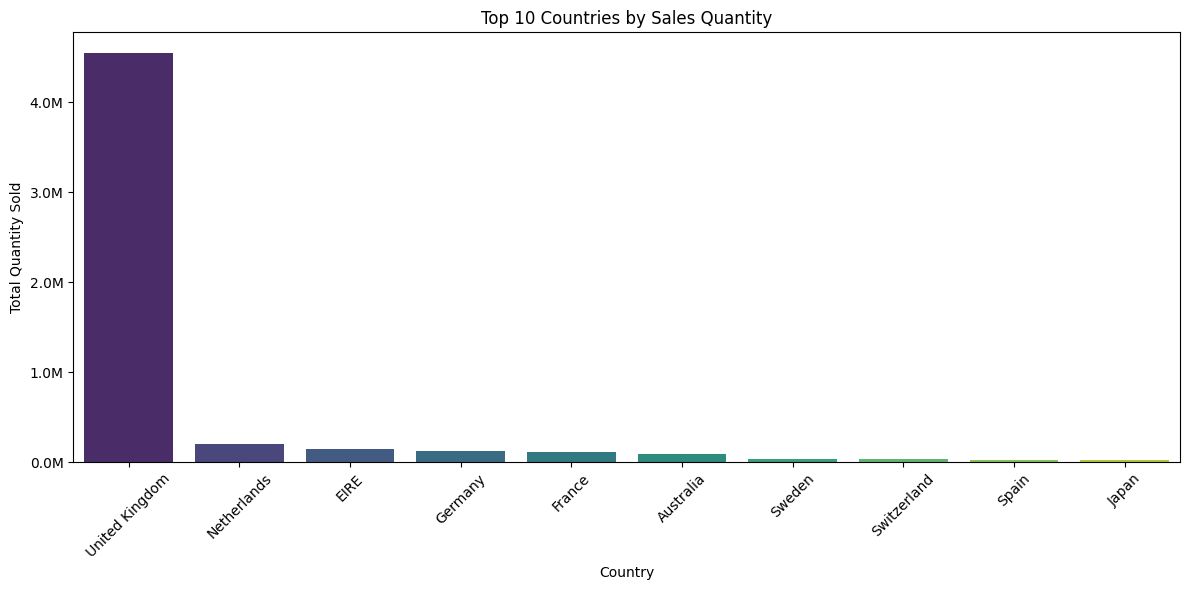

In [ ]:
#create a bar plot for the top 10 countries by quantity
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Sales Quantity')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))
plt.tight_layout()

In [203]:
# Sort by transactions per country
top_countries_transactions = df.groupby('Country')['InvoiceDate'].count().sort_values(ascending=False).head(10)
top_countries_transactions.head(10)

Country
United Kingdom    264580
Germany             5820
France              5172
EIRE                4935
Netherlands         1549
Spain               1539
Belgium             1252
Switzerland         1092
Portugal             884
Australia            768
Name: InvoiceDate, dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\1756073521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_transactions.index, y=top_countries_transactions.values, palette='viridis')


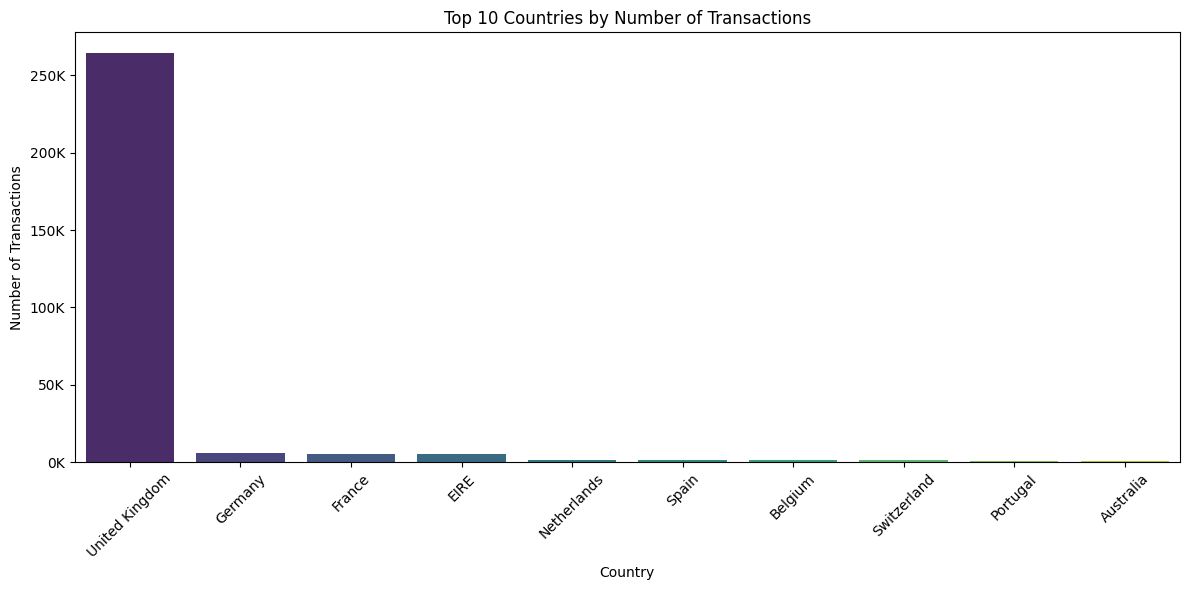

In [205]:
#plot the top 10 countries by number of transactions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_transactions.index, y=top_countries_transactions.values, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.tight_layout()

## Top Country Summary
The UK has a significant lead in sales with over 4.5 million items sold and more than 264k separate transactions, indicating the main customer base and market presence.
The Netherlands, Ireland, Germany, and France also contribute noticably in item sales,  indicating bulk orders from the Netherlands while Germany, Ireland, and France suggest a different market behaviour with more consistent perchasing activity with smaller average order sizes.

## Monthly and Sales Trends
How do total sales quantities vary by month, and which month has the highest individual sales?

In [186]:
#sort by which month has the most quantity sales
top_months = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum().sort_values(ascending=False).head(12)
top_months.head(12)

InvoiceDate
2011-11    553541
2011-10    439811
2011-09    393139
2011-08    289256
2011-05    286206
2011-07    280105
2011-06    278684
2011-03    268430
2010-12    262600
2011-01    226022
2011-04    220650
2011-02    203724
Freq: M, Name: Quantity, dtype: int64

In [187]:
# Reorder the months to show names in order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
top_months.index = pd.to_datetime(top_months.index.astype(str)).month_name()
top_months = top_months.reindex(ordered_months, fill_value=0)
top_months.head(12)

InvoiceDate
January      226022
February     203724
March        268430
April        220650
May          286206
June         278684
July         280105
August       289256
September    393139
October      439811
November     553541
December     262600
Name: Quantity, dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\3933674285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_months.index, y=top_months.values, palette='viridis')


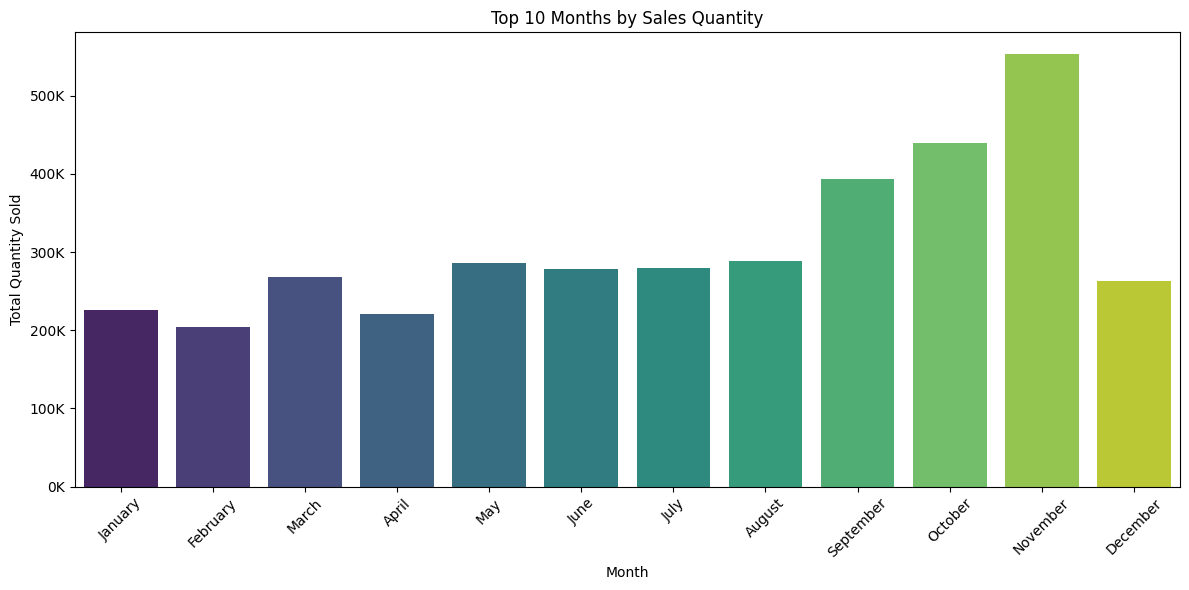

In [ ]:
#create a bar graph for the top 10 months by quantity
plt.figure(figsize=(12, 6))
sns.barplot(x=top_months.index, y=top_months.values, palette='viridis')
plt.title('Top 10 Months by Sales Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.tight_layout()

In [192]:
# count the number of individual transactions per month
monthly_transactions = df.groupby(df['InvoiceDate'].dt.to_period('M')).size().sort_values(ascending=False).head(12)

# Reorder the months to show names in order
monthly_transactions.index = pd.to_datetime(monthly_transactions.index.astype(str)).month_name()
monthly_transactions = monthly_transactions.reindex(ordered_months, fill_value=0)

monthly_transactions.head(12)


InvoiceDate
January      17596
February     15249
March        20377
April        16745
May          21316
June         20659
July         20678
August       19152
September    27748
October      33143
November     45485
December     21466
dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\851527683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_transactions.index, y=monthly_transactions.values, palette='viridis')


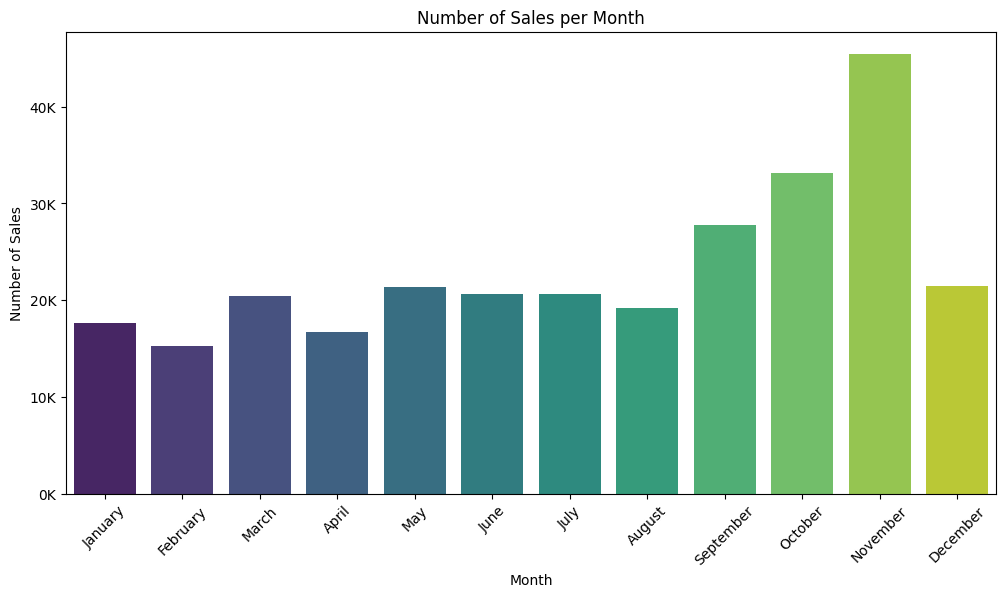

In [194]:
# create a bar plot for the number of sales per month in order
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_transactions.index, y=monthly_transactions.values, palette='viridis')
plt.title('Number of Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.xticks(rotation=45)
plt.show()

## Monthly Sales Trends Summary
The monthly sales show clear seasonal differences with November experiencing the highest volume of sales, likely due to holiday shopping. These analyses suggest that both the frequency and size of purchases increase during autumn months, peaking in November. This highlights opportunities for maximizing revenue with targeted campaigns.

## Daily Sales Trends of the Highest Selling Month
In the month with the highest sales, how do sales quantities vary by day? How do transactions compare?

In [215]:
#sort data by which day of the week has the most quantities sold in November
november_data = df[df['InvoiceDate'].dt.month == 11]
top_days = november_data.groupby(november_data['InvoiceDate'].dt.day_name())['Quantity'].sum().sort_values(ascending=False)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
top_days = top_days.reindex(ordered_days, fill_value=0)
top_days.head(10)

InvoiceDate
Monday       105472
Tuesday      104562
Wednesday    119034
Thursday      98865
Friday        74202
Sunday        51406
Name: Quantity, dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\2414975087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_days.index, y=top_days.values, palette='viridis')


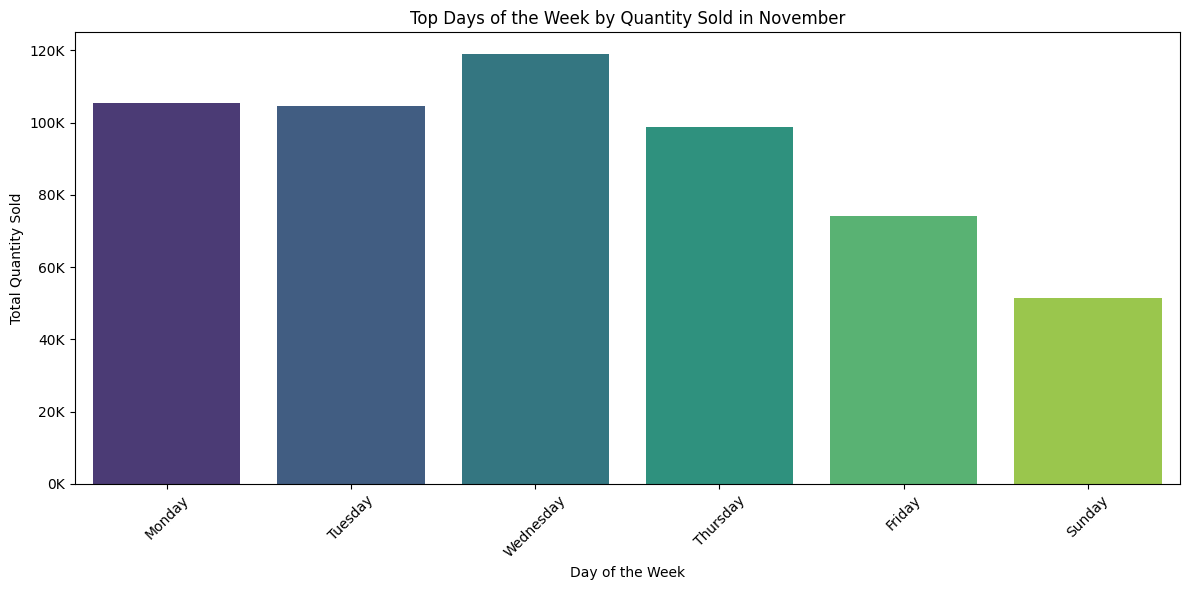

In [216]:
# plot a bar graph for the day with the most quantities sold in November
plt.figure(figsize=(12, 6))
sns.barplot(x=top_days.index, y=top_days.values, palette='viridis')
plt.title('Top Days of the Week by Quantity Sold in November')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Filter to November data and group
november_data = df[df['InvoiceDate'].dt.month == 11]
top_days = november_data.groupby(november_data['InvoiceDate'].dt.day_name()).size()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
top_days = top_days.reindex(ordered_days, fill_value=0)

top_days.head(10)

InvoiceDate
Monday       6577
Tuesday      9044
Wednesday    8771
Thursday     7234
Friday       6654
Sunday       7205
dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\591664725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_days.index, y=top_days.values, palette='viridis')


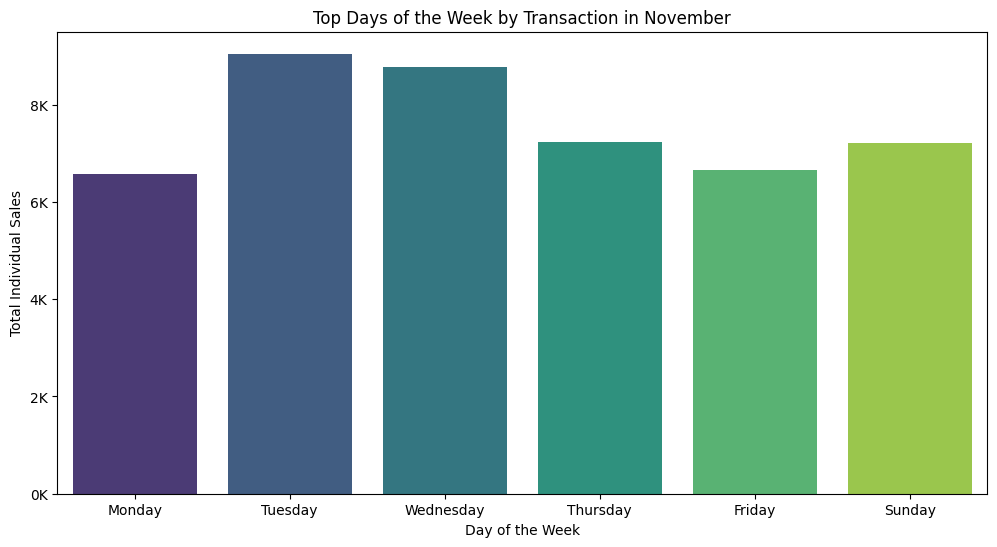

In [214]:
#create a bar graph for the days of the week by transaction in November
plt.figure(figsize=(12, 6))
sns.barplot(x=top_days.index, y=top_days.values, palette='viridis')
plt.title('Top Days of the Week by Transaction in November')
plt.xlabel('Day of the Week')
plt.ylabel('Total Individual Sales')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

## Summary of Daily Sales Trends in November
In November, Wednesdays see the highest item quantities sold at about 119K items, with Monday and Tuesday coming in second.
The highest number of transactions occur on Tuesday at 9,000, with Wednesday following closely behind. This shows that early/mid-week are the peak times of purchace activity and sales volume to plan inventory management and staffing/scheduling around.

## Sales Patterns by Day of the Week
Which days of the week see the highest number of sales quantities and transactions overall?

In [231]:
# Calculate overall top days by quantity sold
overall_top_days = df.groupby(df['InvoiceDate'].dt.day_name())['Quantity'].sum().sort_values(ascending=False)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
overall_top_days = overall_top_days.reindex(ordered_days, fill_value=0)

overall_top_days.head(10)


InvoiceDate
Monday       613199
Tuesday      740286
Wednesday    725230
Thursday     878563
Friday       581183
Sunday       332226
Name: Quantity, dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\715325998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_top_days.index, y=overall_top_days.values, palette='viridis')


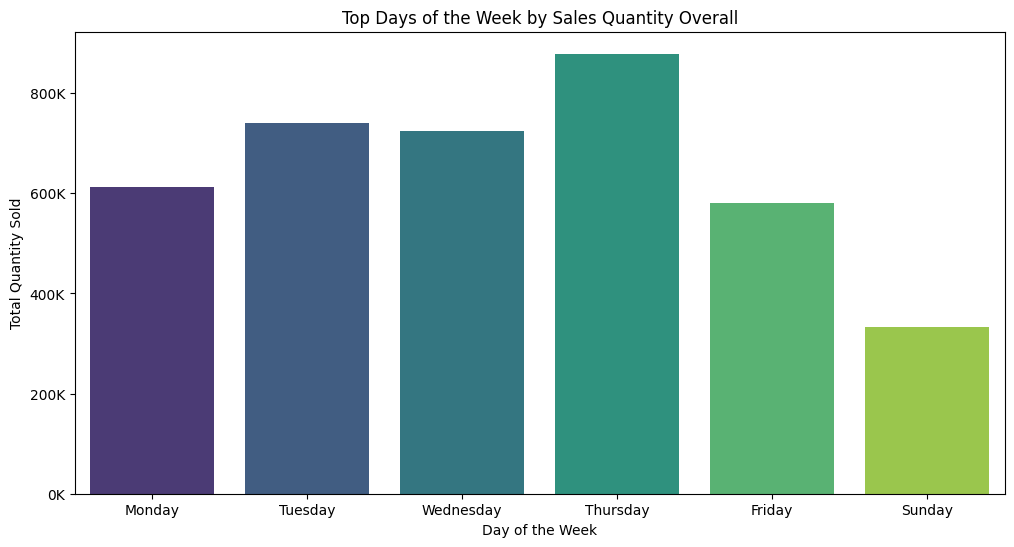

In [233]:
#create a bar graph for the days of the week by quantity sold
plt.figure(figsize=(12, 6))
sns.barplot(x=overall_top_days.index, y=overall_top_days.values, palette='viridis')
plt.title('Top Days of the Week by Sales Quantity Overall')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

In [234]:
# sort the data by how many transactions occur on each day of the week overall
top_days_transactions = df.groupby(df['InvoiceDate'].dt.day_name()).size()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
top_days_transactions = top_days_transactions.reindex(ordered_days, fill_value=0)
top_days_transactions.head(10)

InvoiceDate
Monday       48387
Tuesday      53507
Wednesday    50828
Thursday     57547
Friday       43608
Sunday       38669
dtype: int64

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\3658215796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_days_transactions.index, y=top_days_transactions.values, palette='viridis')


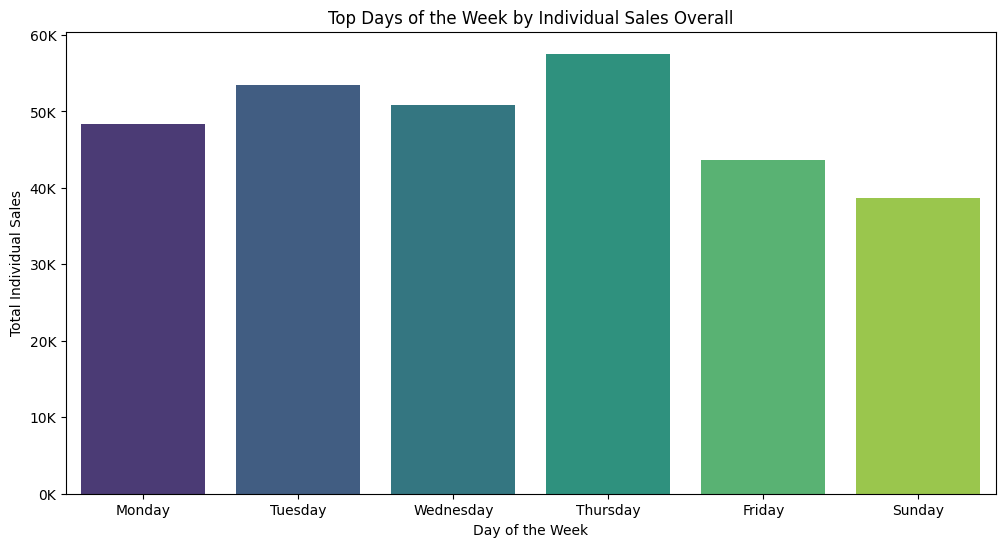

In [235]:
#create a bar graph for the days of the week by transaction overall
plt.figure(figsize=(12, 6))
sns.barplot(x=top_days_transactions.index, y=top_days_transactions.values, palette='viridis')
plt.title('Top Days of the Week by Individual Sales Overall')
plt.xlabel('Day of the Week')
plt.ylabel('Total Individual Sales')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

## Daily/Weekly Sales Patterns Summary
Thursday consistently has the highest sales with about 878.5k items sold and about 57.5k transactions with Tuesday and Wednesday following close behind in transaction, but a bit more of a distance in number of items sold.
Friday and Sunday consistently show the lowest sales activtity.
The data continues to prove the strong customer activity during the mid-week range and significant slow-down during the weekend times. This may reflect customer shopping habits on the weekends or business operational factors.

## Average Daily Revenue per Month
What is the average daily revenue for each month?

In [242]:
# sort the data by average daily revenue for each month
#create a new column for revenue
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df['Date'] = df['InvoiceDate'].dt.date

#calculate daily revenue and extract month
daily_revenue = df.groupby(['Date'])['Revenue'].sum().reset_index()
daily_revenue['Month'] = pd.to_datetime(daily_revenue['Date']).dt.month_name()

#calculate average daily revenue per month
monthly_avg_daily_revenue = daily_revenue.groupby('Month')['Revenue'].mean()
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_daily_revenue = monthly_avg_daily_revenue.reindex(ordered_months)

monthly_avg_daily_revenue = monthly_avg_daily_revenue.apply(lambda x: f"£{x:,.2f}")


monthly_avg_daily_revenue.head(12)


Month
January      £18,573.63
February     £16,043.70
March        £19,460.39
April        £19,051.40
May          £22,795.06
June         £21,417.32
July         £19,754.65
August       £19,996.40
September    £28,957.90
October      £32,033.51
November     £43,665.11
December     £34,765.59
Name: Revenue, dtype: object

C:\Users\sewit\AppData\Local\Temp\ipykernel_15236\173414356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_daily_revenue.index, y=daily_revenue.groupby('Month')['Revenue'].mean().reindex(monthly_avg_daily_revenue.index).values, palette='viridis')


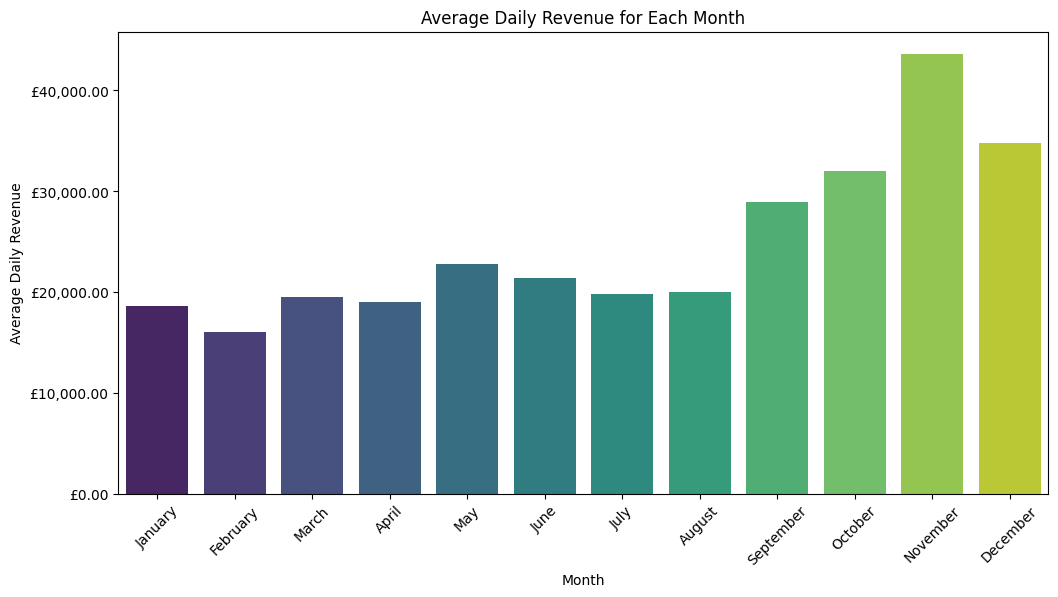

In [241]:
#plot the average revenue for each month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_daily_revenue.index, y=daily_revenue.groupby('Month')['Revenue'].mean().reindex(monthly_avg_daily_revenue.index).values, palette='viridis')
plt.title('Average Daily Revenue for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Revenue')
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'£{x:,.2f}'))
plt.xticks(rotation=45)
plt.show()

## Daily Avg Revenue per Month Summary
This section shows that November has the highest daily average revenue at about £43.5k. This reflects the autumn peak in sales leading up to the holiday season, whereas February has the lowest average daily revenue, indicating seasonal sales fluctuations and possibly informing budget planning, promotional campaigns, and inventory management.

## Final Summary

This analysis explored patterns in online retail data from 2010–2011 to identify high-performing months, days of the week. THe analysis follows a structured approach to uncover key sales trends and customer behaviours.

### Data Cleaning & Preparation
- Removed duplicate records and filtered transactions out with negative or extremely high quantities for data quality.
- Filtered out irrelevant columns down to Quantity, InvoiceDate, UnitPrice, and Country. Also removed Saturdays due to lack of sales activity, likely due to being closed.
- Created a revenue feature and extracted date components for time-based analyses.

### Top Performing Countries
- The UK dominates the market with the highest transactions and sales quantities.
- The next countries of note include the Netherlands, Germany, Ireland, and France, with distinct purchasing activity.

### Monthly Sales Trends
- November is the peak for sales quantities and transactions, likely due to holiday shopping.
- Autumn months have increased activity for the year, which suggests strong seasonality in customer demand.

### Daily and Weekly Sales Patterns
- With November as the highest selling month, I checked for the weekday with the highest selling quantities sold, which was Wednesdays and early to mid-week days being the highest point of activity.
- Across the whole year Thursdays were consistently seeing the most sales while Fridays and Sundays had noticably lower activity than the rest of the week.

### Average Daily Revenue
- Aligning with previous observations, November generates the highest average daily revenue.
- These revenue trends reinforce the importance of pushing business efforts during peak months.

### Business Implications
- This analysis points to UK as the primary market which suggest targeted marketing and resource allocation.
- The seasonal and weekly activity spike patterns present opportunities for increased inventory management, staffing, and promotional campaigns.
- These trends provide data to enable decision making to optimize business operations and maximize profitability.

This exploratory analysis provides insights into sales distribution, seasonal activity, and customer behaviour. It supports strategic planning for resource management, marketing, and logistics.